#TITANIC :  LEARNING FROM DISASTER

The following dataset has been taken from kaggle. 
https://www.kaggle.com/c/titanic/data

Dataset description:The dataset has a set of 12 columns ,namely:passenger ID, passenger class, name, sex, age, sibsp,parch,ticket,fare,embarked and survived.Rest of the info will be follow as we go...




Importing the required libraries: Numpy(for mathematical calculations),Pandas(),Matplot lib(for graphs), OS(to upload the saved .csv),Seaborn(for visualisation tools)  and Sklearn( for training tools)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import files
files.upload()


Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [0]:
titanic= pd.read_csv("train.csv") #Saving the csv file into a dataframe "titanic"


In [0]:
 titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


After looking at the head and the desription, It is observed that the dataset has 12 columns :passengerId,name, ticket ,parch,cabin,sex,age
,SibSp( if the passenger has a sibling or a spouse),
embarked(the station where passengers embarked the ship :priceton,)
,Pclass(1,2,3)

survived column is the target


#we use seaborn tools for some visualisation of all data available

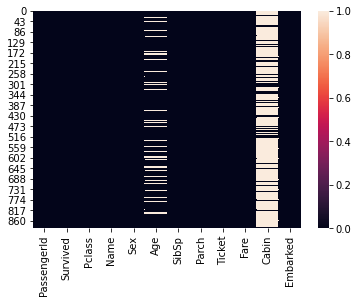

In [0]:
#heatmap null for checking if the dataframe has any null values
sns.heatmap(titanic.isnull())

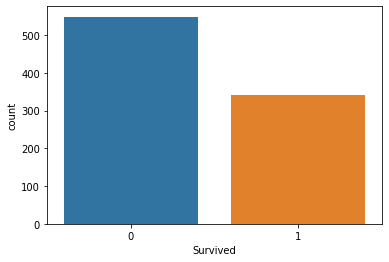

In [0]:
# The graph shows the probability of no of deaths to survival (death:survival::0:1)
sns.countplot(x='Survived',data=titanic)

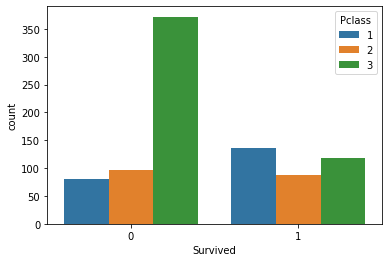

In [0]:
#The graph shows the probability of no of deaths to survival of different passenger classes
sns.countplot(x='Survived',hue='Pclass',data=titanic)

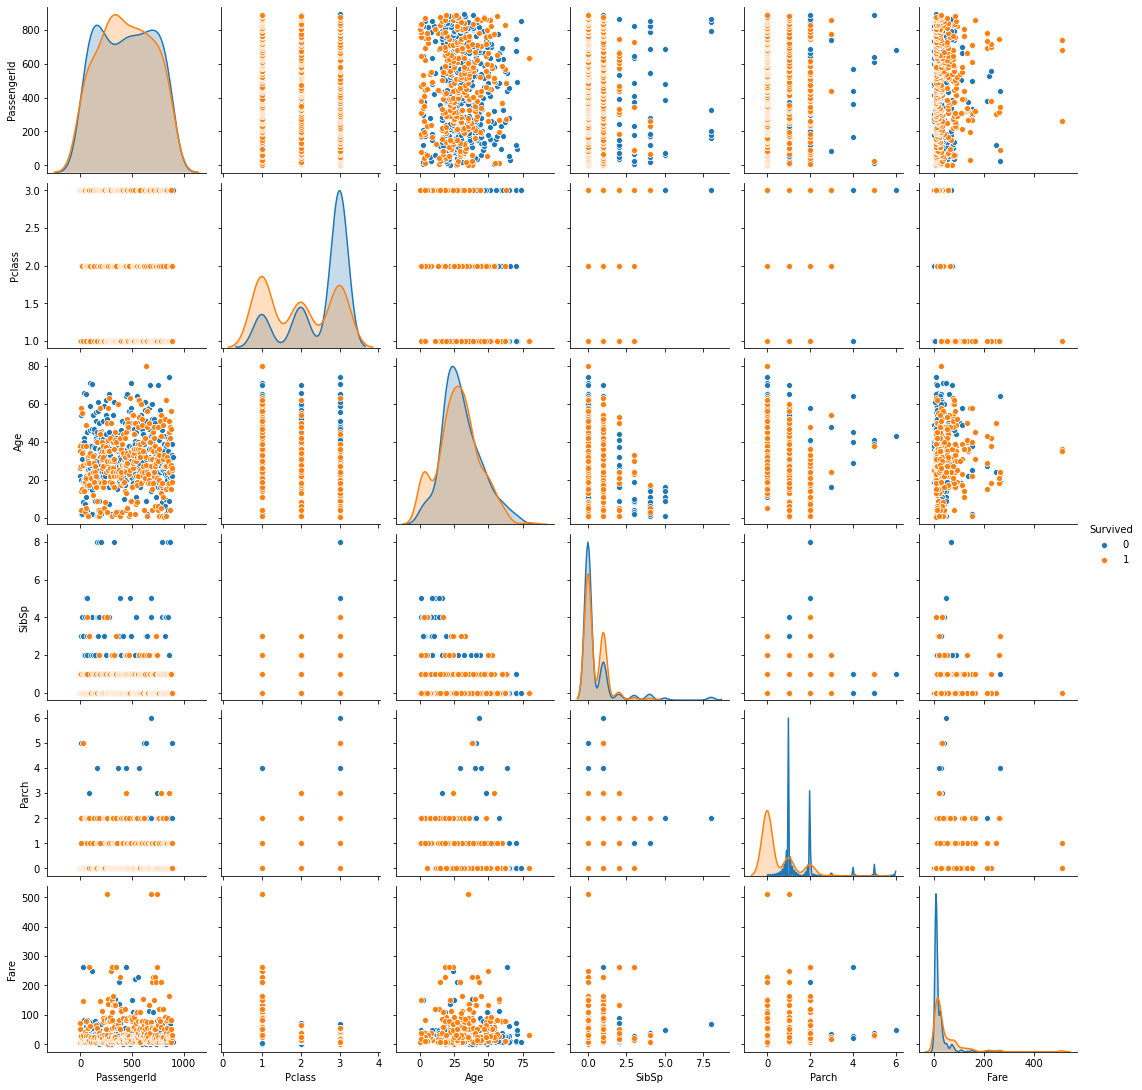

In [0]:
#visualisation of all the features 
sns.pairplot(titanic,hue='Survived')

 the features are compared using PEASON CORRELATION :

In [0]:
data2 = titanic.corr('pearson')
data2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [0]:
#absolute value of correlation
 abs(data2.loc['Survived']).sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

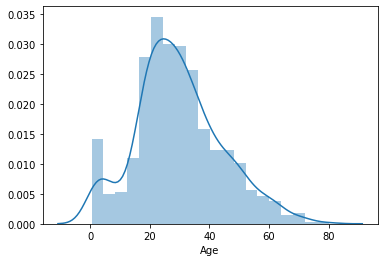

In [0]:
sns.distplot(titanic['Age'])

#dropping of null/insignificant features

In [0]:
#cabin column is mostly empty ,so we drop the columnn
titanic.drop('Cabin',axis=1,inplace=True)


we use a dummy variable called "male" to convert the text column 'sex' into a binary/integer and drop the "female" column

In [0]:
Male=pd.get_dummies(titanic['Sex'],drop_first=True)

we use a dummy variable called "embark" to convert the text column 'embarked' into a binary/integer and drop the "C" column

In [0]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [0]:
titanic.drop('Embarked',axis=1,inplace=True)


we concatenate titanic data, and the two new columns "male" and"embark" into the titanic dataframe

In [0]:
titanic=pd.concat([titanic,Male,embark],axis=1)

In [0]:
titanic.drop(['Name','Sex','Ticket','PassengerId'],axis=1,inplace=True)

In [0]:
titanic.drop(['Age'],axis=1,inplace=True)

In [0]:
#dropna is used to drop null values,if any
titanic.dropna()

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,0,3,1,0,7.2500,1,0,1
1,1,1,1,0,71.2833,0,0,0
2,1,3,0,0,7.9250,0,0,1
3,1,1,1,0,53.1000,0,0,1
4,0,3,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,0,1
887,1,1,0,0,30.0000,0,0,1
888,0,3,1,2,23.4500,0,0,1
889,1,1,0,0,30.0000,1,0,0


after dropping the values

In [0]:
X.head()

,Pclass,SibSp,Parch,Fare,male,Q,S
0,0.827377,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


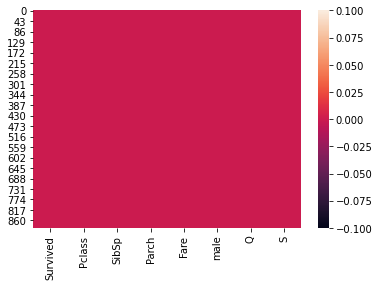

In [0]:
sns.heatmap(titanic.isnull())

SCALING THE DATA

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [0]:
scaler.fit(titanic.drop('Survived',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features=scaler.transform(titanic.drop('Survived',axis=1))


In [0]:
df_feat=pd.DataFrame(scaled_features,columns=titanic.drop('Survived', axis=1).columns)

In [0]:
df_feat

,Pclass,SibSp,Parch,Fare,male,Q,S
0,0.827377,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.619306
887,-1.566107,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.619306
888,0.827377,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.619306
889,-1.566107,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.614710


In [0]:
#raw code for knn algorithm( euclid distance,calc_distance, get neighbours,predict,accuracy)

def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)

def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda mytup: mytup[0])
    return all_distances

def get_neighbours(distances, count):
    return distances[:count]

def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 3)
    op = [row[-1] for row in neighbours]
    prediction = max(op, key=op.count)
    return prediction



#training the model 

In [0]:
X=df_feat
Y=titanic['Survived']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [0]:
x_train.head()

,Pclass,SibSp,Parch,Fare,male,Q,S
347,0.827377,0.432793,-0.473674,-0.324253,-1.355574,-0.307562,0.619306
45,0.827377,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306
828,0.827377,-0.474545,-0.473674,-0.492378,0.737695,3.251373,-1.614710
153,0.827377,-0.474545,2.008933,-0.356469,0.737695,-0.307562,0.619306
288,-0.369365,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.619306


CHOOSE 2 FEATURES AND NAME THEM F1 AND F2

In [0]:
f1 = 'Pclass'
f2 = 'Fare'

basex = np.array(x_train[[f1, f2]])
basey = np.array(y_train)

xtest = np.array(x_test[[f1, f2]])
ytest = np.array(y_test)

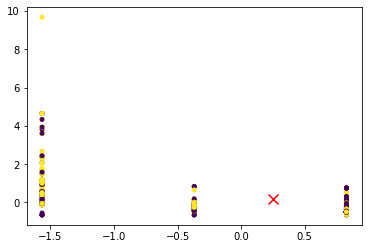

In [0]:
x = pd.DataFrame(basex)
y = basey

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

CODE FOR ACCURACY FUNCTION

In [0]:
#accuracy code
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [0]:
print(accuracy(basex,basey,xtest,ytest))

Accuracy: 67.0391061452514%
